In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import imblearn
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import average_precision_score, precision_score, recall_score
from matplotlib import pyplot
from itertools import zip_longest
import csv
import os.path
import pickle

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pip install imbalanced-learn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
initial_data = pd.read_csv('data.csv')
outcome_data = pd.read_csv('outcome.csv')
fixed_test = pd.read_csv('fixed_test.csv')
initial_data.head()

# preprocess the features
for col in initial_data.columns: 
  if col.find('vitals') == 0:
    initial_data[col].fillna(value=initial_data[col].median(),inplace=True)
  elif col.find('lab') == 0:
    initial_data[col].fillna(value=initial_data[col].median(),inplace=True)
  elif col.find('pmhx') == 0:
    initial_data[col].fillna(value=initial_data.mode()[col][0],inplace=True)

for col in fixed_test.columns: 
  if col.find('vitals') == 0:
    fixed_test[col].fillna(value=fixed_test[col].median(),inplace=True)
  elif col.find('lab') == 0:
    fixed_test[col].fillna(value=fixed_test[col].median(),inplace=True)
  elif col.find('pmhx') == 0:
    fixed_test[col].fillna(value=fixed_test.mode()[col][0],inplace=True)

# preprocess the sex and diagnosis
initial_data['sex'] = initial_data['sex'].map({'MALE':1,'FEMALE':0})
initial_data['ed_diagnosis'] = initial_data['ed_diagnosis'].map({'sx_breathing_difficulty':1,'sx_others':2,'sx_flu':3,'sx_fever':4,'sx_cough':5})
fixed_test['sex'] = fixed_test['sex'].map({'MALE':1,'FEMALE':0})
fixed_test['ed_diagnosis'] = fixed_test['ed_diagnosis'].map({'sx_breathing_difficulty':1,'sx_others':2,'sx_flu':3,'sx_fever':4,'sx_cough':5})

# preprocess the date
initial_data['admission_datetime'] = pd.to_datetime(initial_data['admission_datetime'], format='%Y/%m/%d').values.astype(np.int64)
#initial_data.head(6)
fixed_test['admission_datetime'] = pd.to_datetime(fixed_test['admission_datetime'], format='%Y/%m/%d').values.astype(np.int64)
fixed_test.head(6)

,PATIENT ID,age,sex,admission_datetime,ed_diagnosis,vitals_temp_ed_first,vitals_sbp_ed_first,vitals_dbp_ed_first,vitals_hr_ed_first,vitals_spo2_ed_first,pmhx_diabetes,pmhx_hld,pmhx_htn,pmhx_ihd,pmhx_ckd,pmhx_copd,pmhx_asthma,pmhx_activecancer,pmhx_chronicliver,pmhx_stroke,pmhx_chf,pmhx_dementia,lab_aptt,lab_ldh,lab_sodium,lab_alt,lab_ddimer,lab_glucose,lab_potassium,lab_mch,lab_mean_platelet_volume,lab_inr,lab_hct,lab_creatinine,lab_ast,lab_crp,lab_mcv,lab_leukocyte,lab_lymphocyte_percentage,lab_prothrombin_activity,lab_urea,lab_rbc,lab_platelet,lab_neutrophil,lab_neutrophil_percentage,lab_lymphocyte,lab_rdw,lab_hemoglobin
0,1636,42,1,1585991580000000000,1,36.6,120,70,74,94,0,0,0,0,0,0,0,0,0,0,0,0,31.0,511.4,131.5,32.7,617.0,101.7,4.12,29.3,8.7,1.23,44.6,1.07,32.9,26.56,83.2,4.13,21.1,70,23.4,5.36,133,2.95,71.4,0.87,12.3,15.7
1,734,79,1,1584961560000000000,4,36.5,136,65,94,95,0,0,0,1,0,0,0,0,0,0,0,0,32.4,518.1,135.8,18.1,442.0,130.2,3.83,31.5,11.3,1.40,44.6,1.65,32.9,152.37,91.2,6.59,10.9,63,86.0,4.89,138,5.30,80.5,0.72,15.4,15.4
2,1045,86,1,1585171860000000000,1,37.0,141,89,102,72,0,0,0,0,0,0,0,0,0,1,0,0,30.8,1031.0,142.0,11.0,2644.0,87.0,4.25,34.5,11.9,1.32,45.9,0.96,25.0,113.63,100.2,8.12,15.9,65,58.2,4.58,242,6.30,77.6,1.29,13.9,15.8
3,1728,84,0,1586032440000000000,1,36.6,132,76,89,94,0,0,0,0,0,0,0,0,0,1,0,0,32.4,517.0,137.4,26.0,693.5,112.0,4.22,29.7,10.2,1.19,41.0,0.87,32.0,63.36,88.3,6.34,17.9,77,33.0,4.67,203,4.42,72.9,1.10,12.8,13.8
4,1267,88,0,1586901360000000000,2,36.1,119,74,87,91,0,1,0,0,0,0,0,0,0,0,0,1,32.4,517.0,140.6,26.0,693.5,136.5,3.66,24.9,10.7,1.19,38.4,1.91,32.0,1.20,78.4,7.52,16.0,77,121.9,4.90,141,5.65,75.1,1.20,13.6,12.2
5,1565,41,1,1585224540000000000,1,36.5,146,90,106,93,0,0,0,0,0,0,0,0,0,0,0,0,32.2,510.0,140.0,36.0,973.0,103.0,3.96,29.2,9.9,1.11,41.6,0.85,24.0,73.80,85.8,8.48,22.2,85,20.4,4.85,324,4.10,56.1,1.88,12.3,14.1


In [ ]:
X = initial_data.iloc[:, np.r_[1:3, 4:48]]
#X = initial_data.iloc[:, np.r_[0:8, 21:47]]
y = outcome_data['hospital_outcome']
X.head(6)

,age,sex,ed_diagnosis,vitals_temp_ed_first,vitals_sbp_ed_first,vitals_dbp_ed_first,vitals_hr_ed_first,vitals_spo2_ed_first,pmhx_diabetes,pmhx_hld,pmhx_htn,pmhx_ihd,pmhx_ckd,pmhx_copd,pmhx_asthma,pmhx_activecancer,pmhx_chronicliver,pmhx_stroke,pmhx_chf,pmhx_dementia,lab_aptt,lab_ldh,lab_sodium,lab_alt,lab_ddimer,lab_glucose,lab_potassium,lab_mch,lab_mean_platelet_volume,lab_inr,lab_hct,lab_creatinine,lab_ast,lab_crp,lab_mcv,lab_leukocyte,lab_lymphocyte_percentage,lab_prothrombin_activity,lab_urea,lab_rbc,lab_platelet,lab_neutrophil,lab_neutrophil_percentage,lab_lymphocyte,lab_rdw,lab_hemoglobin
0,72,1,1,37.2,111.0,63.0,94.0,60.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.3,593.00,135.0,118.00,908.0,124.0,4.34,32.9,11.2,1.21,36.0,0.94,45.0,95.04,96.3,11.600,5.0,70.0,67.0,3.74,238.0,10.03,86.5,0.62,13.0,13.8
1,50,0,1,37.2,131.0,76.0,93.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.4,430.60,138.2,27.40,234.0,91.1,4.57,27.1,10.0,1.15,39.8,0.67,25.8,23.93,82.4,5.000,28.0,78.0,26.4,4.83,197.0,3.41,68.2,1.40,13.9,13.1
2,78,0,1,36.4,146.0,96.0,85.0,96.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,522.75,137.1,25.65,744.0,113.6,4.20,29.8,10.3,1.19,41.1,0.91,31.6,68.36,88.2,6.635,16.9,76.0,34.8,4.67,203.0,4.83,74.0,1.05,12.9,13.9
3,50,1,1,37.7,131.0,76.0,124.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.8,694.40,136.5,66.60,416.0,96.2,4.39,27.6,10.0,1.24,44.8,0.88,83.1,71.26,84.2,6.160,20.2,69.0,40.9,5.32,178.0,4.60,74.6,1.18,13.3,14.7
4,38,1,1,36.6,131.0,76.0,88.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.1,790.10,135.1,62.70,284.0,105.2,3.69,30.0,9.7,1.11,39.2,0.77,79.5,128.42,87.9,7.020,16.5,89.0,12.6,4.46,298.0,4.92,70.1,1.16,10.6,13.4
5,95,1,1,36.6,160.0,11.0,76.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,522.75,137.1,25.65,744.0,113.6,4.20,28.7,11.3,1.19,38.6,0.91,31.6,68.36,92.3,11.600,6.9,76.0,34.8,4.18,279.0,10.00,85.9,0.80,16.9,12.0


In [ ]:
# check if data is missing
for col in initial_data.columns: 
  no_missing = initial_data[col].isnull().sum()
  if no_missing > 0:
    print(col)
    print(no_missing)
  else:
    print(col)
    print("No missing values")
    print(' ')

PATIENT ID
No missing values
 
age
No missing values
 
sex
No missing values
 
admission_datetime
No missing values
 
ed_diagnosis
No missing values
 
vitals_temp_ed_first
No missing values
 
vitals_sbp_ed_first
No missing values
 
vitals_dbp_ed_first
No missing values
 
vitals_hr_ed_first
No missing values
 
vitals_spo2_ed_first
No missing values
 
pmhx_diabetes
No missing values
 
pmhx_hld
No missing values
 
pmhx_htn
No missing values
 
pmhx_ihd
No missing values
 
pmhx_ckd
No missing values
 
pmhx_copd
No missing values
 
pmhx_asthma
No missing values
 
pmhx_activecancer
No missing values
 
pmhx_chronicliver
No missing values
 
pmhx_stroke
No missing values
 
pmhx_chf
No missing values
 
pmhx_dementia
No missing values
 
lab_aptt
No missing values
 
lab_ldh
No missing values
 
lab_sodium
No missing values
 
lab_alt
No missing values
 
lab_ddimer
No missing values
 
lab_glucose
No missing values
 
lab_potassium
No missing values
 
lab_mch
No missing values
 
lab_mean_platelet_volume

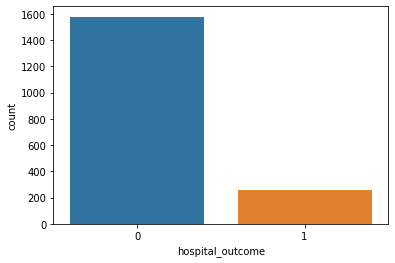

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(outcome_data['hospital_outcome'])

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)
X_res, y_res = SMOTE().fit_sample(X_train, y_train)

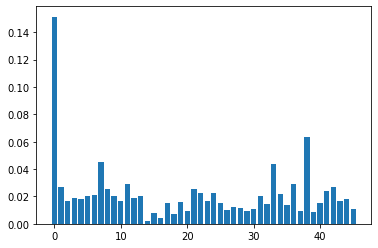

0.7771495809895534
0.719562103540004
length: 612
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 

In [ ]:
model = RandomForestClassifier()
#model.fit(X_train, y_train)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

# get importance
importance = model.feature_importances_
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
#print(len(y_pred))

X_test = fixed_test.iloc[:, np.r_[1:3, 4:48]]
y_pred = model.predict(X_test)
print("length:", len(y_pred))
print(y_pred)

n = 612
lists = [[] for i in range(n)]
lists[0] = fixed_test['PATIENT ID']
lists[1] = y_pred
rows = zip_longest(*lists, fillvalue = '')
with open("106060018_HW2.csv", "w") as f:
  writer = csv.writer(f)
  writer.writerow(['PATIENT ID', 'hospital_outcome'])
  for row in rows:
    writer.writerow(row)
filename = '106060018_HW2_Model.sav'
pickle.dump(model, open(filename, 'wb'))

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [15]:
fixed_test = pd.read_csv('fixed_test.csv')

# pre-process the test data
fixed_test['sex'] = fixed_test['sex'].map({'MALE':1,'FEMALE':0})
fixed_test['ed_diagnosis'] = fixed_test['ed_diagnosis'].map({'sx_breathing_difficulty':1,'sx_others':2,'sx_flu':3,
                                'sx_fever':4,'sx_cough':5})

X_test = fixed_test.iloc[:, np.r_[1:3, 4:48]]

# load the model from disk
loaded_model = pickle.load(open('106060018_HW2_Model.sav', 'rb'))
result = loaded_model.predict(X_test)
print(result)

n = 612
lists = [[] for i in range(n)]
lists[0] = fixed_test['PATIENT ID']
lists[1] = result
rows = zip_longest(*lists, fillvalue = '')
with open("106060018_HW2.csv", "w") as f:
  writer = csv.writer(f)
  writer.writerow(['PATIENT ID', 'hospital_outcome'])
  for row in rows:
    writer.writerow(row)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 